<a href="https://colab.research.google.com/github/Secatorrez/uouw_py_ml/blob/main/Kalkulator_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zadanie: Kalkulator BMI**

Napisz program, który będzie służył jako prosty kalkulator BMI (Body Mass Index). BMI jest wskaźnikiem, który oblicza stosunek wagi do wzrostu i jest używany do oceny czy dana osoba ma prawidłową masę ciała.

Zasady obliczania BMI:

    Poproś użytkownika o podanie swojej wagi w kilogramach (float) i wzrostu w metrach (float).
    Na podstawie wprowadzonych danych oblicz BMI według wzoru: BMI = masa / (wzrost^2).
    Wykorzystaj instrukcję warunkową, aby ocenić wynik BMI i wyświetlić odpowiedni komunikat:
        Jeśli BMI < 18.5, wyświetl komunikat "Niedowaga".
        Jeśli 18.5 <= BMI < 25, wyświetl komunikat "Prawidłowa masa ciała".
        Jeśli 25 <= BMI < 30, wyświetl komunikat "Nadwaga".
        Jeśli BMI >= 30, wyświetl komunikat "Otyłość".


In [1]:
#------------------------------------------------------
# Funkcja oblicz BMI
# parametry wejściowe float waga, float wzrost
# zwraca 2-elementową liste.
# 1szy element wskaźnik BMI, 2gi el., opis BMI
#------------------------------------------------------
def BMI(wg, wz):
  retBMI = [0, "BMI nieznane"]
  retBMI [0] = wg / (wz * wz)
  if retBMI [0] < 18.5:
    retBMI [1] = "Niedowaga"
  elif retBMI [0] < 25:
    retBMI [1] = "Prawidłowa masa ciała"
  elif retBMI [0] < 30:
    retBMI [1] = "Nadwaga"
  else:
    retBMI [1] = "Otyłość"
  return retBMI
#------------------------------------------------------
waga = float(input("Podaj swoją wagę (w kg) : "))
wzrost = float(input("Podaj swój wzrost (w metrach) : "))
lista_bmi = BMI(waga, wzrost)
print("Twój BMI : %.2f" %lista_bmi[0], lista_bmi[1] )

Podaj swoją wagę (w kg) : 80
Podaj swój wzrost (w metrach) : 1.85
Twój BMI : 23.37 Prawidłowa masa ciała


A tutaj pozwoliłem sobie na dokładkę wizualizacji wyników za pomoca wykresów z matplotlib. Matplotlib dla początkującego w Pythonie jest dosyć nieprzyjazny, ale udało mi się w miarę przystosować jakiś przykład do celów tego zadania z BMI.
Najpierw trzeba uruchomić to co u góry, bo pobieram wynik BMI z zadania jako parametr do wykresu.
Jak, że nie ma górnej granicy BMI dla otyłości na potrzeby wykresu przyjąłem 60 a jeśli wyliczone BMI > 60 to będzie dopasowanie zrobione, żeby to jakoś graficznie w miare sensownie wyglądało.

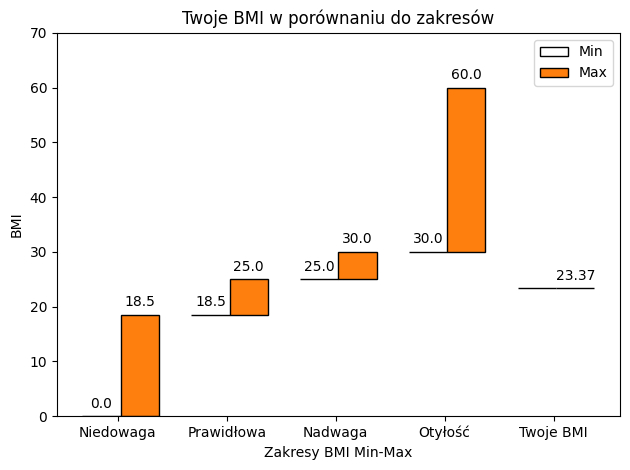

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """
    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        j=0
        for height, rect in zip(heights, rects):
            j+=1
            if j!=5 or (j==5 and i>0):
               ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['Niedowaga', 'Prawidłowa', 'Nadwaga', 'Otyłość', 'Twoje BMI']
bmi_2dec = round(lista_bmi[0], 2)
if lista_bmi[0] > 60:
   top = bmi_2dec + 10
else:
   top = 60

maxBMI = np.array([18.5, 25.0, 30.0, top, bmi_2dec])
minBMI = np.array([0.00, 18.5, 25.0, 30, bmi_2dec])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [minBMI, maxBMI], ['Min', 'Max'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Zakresy BMI Min-Max')
ax.set_ylabel('BMI')

ax.set_ylim(0, top + 10)
ax.set_title('Twoje BMI w porównaniu do zakresów')
ax.legend()

fig.tight_layout()
plt.show()